In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [6]:
train_df = pd.read_csv('/content/train_u6lujuX_CVtuZ9i.csv')
test_df = pd.read_csv('/content/test_Y3wMUE5_7gLdaTN.csv')

In [7]:
train_df .drop(columns=['Loan_ID','Loan_Status'], inplace=True)
test_df .drop(columns=['Loan_ID'], inplace=True)

In [8]:
train_df['Gender'].fillna(value='Male', inplace=True)
train_df['Married'].fillna(value='Yes', inplace=True)
train_df['Dependents'].fillna(value='0', inplace=True)
train_df['Self_Employed'].fillna(value='No', inplace=True)
train_df['LoanAmount'].fillna(value=train_df['LoanAmount'].median(), inplace=True)
train_df['Loan_Amount_Term'].fillna(value=train_df['Loan_Amount_Term'].median(), inplace=True)
train_df['Credit_History'].fillna(value=1.0, inplace=True)

In [9]:
test_df['Gender'].fillna(value='Male', inplace=True)
test_df['Married'].fillna(value='Yes', inplace=True)
test_df['Dependents'].fillna(value='0', inplace=True)
test_df['Self_Employed'].fillna(value='No', inplace=True)
test_df['LoanAmount'].fillna(value=test_df['LoanAmount'].median(), inplace=True)
test_df['Loan_Amount_Term'].fillna(value=test_df['Loan_Amount_Term'].median(), inplace=True)
test_df['Credit_History'].fillna(value=1.0, inplace=True)

In [10]:
le = LabelEncoder()
test_df['Married'] = le.fit_transform(test_df['Married'])
test_df['Gender'] = le.fit_transform(test_df['Gender'])
test_df['Education'] = le.fit_transform(test_df['Education'])
test_df['Property_Area'] = le.fit_transform(test_df['Property_Area'])
test_df['Self_Employed'] = le.fit_transform(test_df['Self_Employed'])

In [11]:
train_df['Married'] = le.fit_transform(train_df['Married'])
train_df['Gender'] = le.fit_transform(train_df['Gender'])
train_df['Education'] = le.fit_transform(train_df['Education'])
train_df['Property_Area'] = le.fit_transform(train_df['Property_Area'])
train_df['Self_Employed'] = le.fit_transform(train_df['Self_Employed'])

In [12]:
def convert_range(value):
    lower_bound = float(value.replace("+", ""))
    upper_bound = 1000 
    return lower_bound

In [13]:
test_df['Dependents'] = test_df['Dependents'].apply(convert_range)
train_df['Dependents'] = train_df['Dependents'].apply(convert_range)

In [14]:
X_train = train_df.drop(columns=['LoanAmount'])
y_train = train_df['LoanAmount']
X_test = test_df.drop(columns=['LoanAmount'])
y_test = test_df['LoanAmount']

In [15]:
model = LinearRegression()

In [16]:
model.fit(X_train, y_train)

LinearRegression()

In [17]:
y_pred = model.predict(X_test)

In [18]:
mse = mean_squared_error(y_test, y_pred)

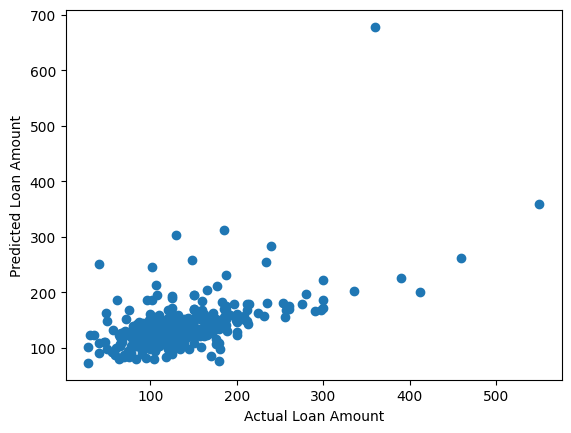

In [19]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Loan Amount')
plt.ylabel('Predicted Loan Amount')
plt.show()

In [20]:
print("Mean squared error: ", mse)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Mean squared error:  2669.5437299479454
Coefficients: [ 4.72357880e+00  1.35560571e+01  5.82607743e+00 -1.51793608e+01
  1.07332071e+01  7.82347440e-03  7.10953043e-03  1.14354531e-01
  9.66818118e-01 -4.32072660e+00]
Intercept: 41.27969123222486


In [21]:
r_squared = model.score(X_test, y_test)
print("R-squared:", r_squared)

R-squared: 0.27966284186792056
